# L2 Linear Regression

The goal of this notebook is to validate the optimization code.
For that, we will compare results against sklearn's linear regression example on the `diabetes` dataset.
See sklearn's example here: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from oktopus.models import LinearModel
from macaw.objective_functions import L2Norm
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [3]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [4]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [5]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [6]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [7]:
# Create linear model object
model = LinearModel(diabetes_X_train.reshape(-1))

In [8]:
# Train the model using the training sets
l2norm = L2Norm(y=diabetes_y_train.reshape(-1), model=model)
results = l2norm.fit(x0=[0., 0.])

In [9]:
# Make predictions using the testing set
diabetes_y_pred = LinearModel(diabetes_X_test).evaluate(*results.x)

In [10]:
print('Coefficients: \n', results.x)

Coefficients: 
 [ 938.23786125  152.91885622]


In [11]:
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Mean squared error: 2548.07


In [12]:
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Variance score: 0.47


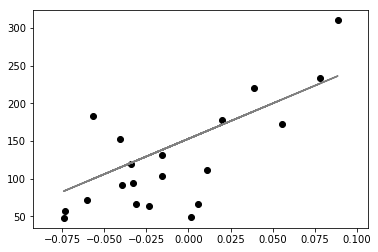

In [13]:
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='grey')